### Examen final - Aplicación de K-means para set de datos de tarjetas de crédito
#### Mario Tabarini
#### 22000349

In [21]:
import pandas as pd # Se importa pandas para manipulación de datos
from summarytools import dfSummary # Librería para revaluar datos estadísticos de dataset
import seaborn as sns
from sklearn.preprocessing import power_transform # Se importa powertransform para normalizar datos

In [22]:
data = pd.read_csv('BankChurners.csv') # Se importa dataset

In [23]:
data.describe() # Se describe data 

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [24]:
dfSummary(data) # Se profundiza en la descripción estadítica de la data, así como de manera visual y proporción de missing values

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [25]:
data.columns # Se muestra cada una de las columnas del dataset a grosso modo

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

[Text(0.5, 1.0, 'Conteo de clientes por promedio disponible para compras')]

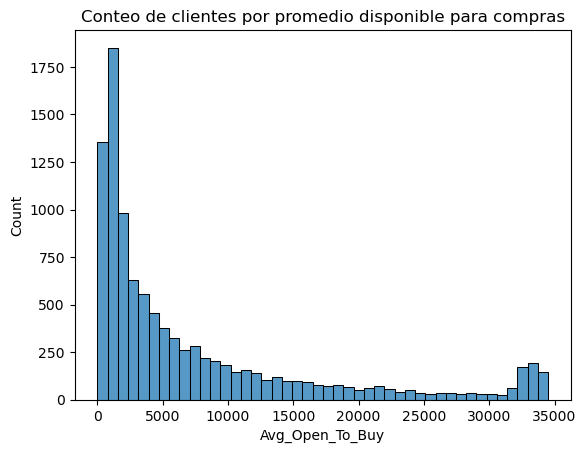

In [66]:
sns.histplot(data=data, x='Avg_Open_To_Buy').set(title="Conteo de clientes por promedio disponible para compras") # Se realiza gráfica de conteo de tarjetas por línea de crédito

[Text(0.5, 1.0, 'Conteo de clientes por cantidad de transacciones')]

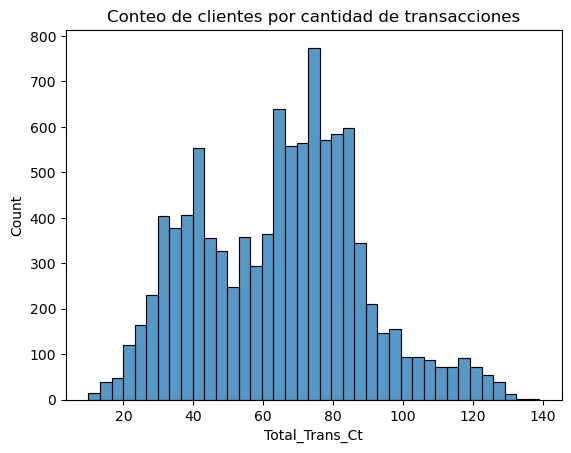

In [67]:
sns.histplot(data=data, x='Total_Trans_Ct').set(title="Conteo de clientes por cantidad de transacciones") # Se realiza gráfica de conteo de tarjetas por edad del cliente

[Text(0.5, 1.0, 'Conteo de clientes por promedio de utilización de tarjeta')]

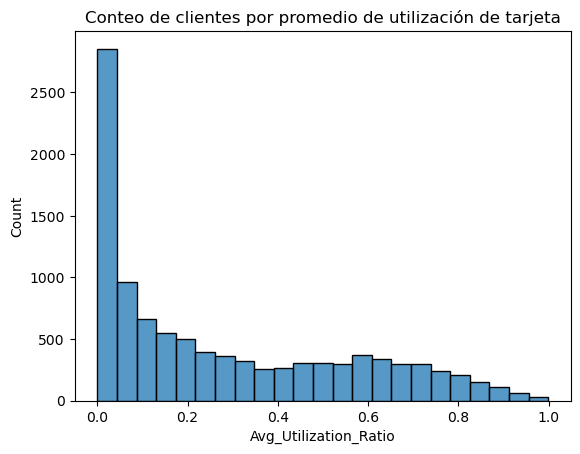

In [68]:
sns.histplot(data=data, x="Avg_Utilization_Ratio").set(title="Conteo de clientes por promedio de utilización de tarjeta") # Se realiza gráfica de conteo de tarjetas por tasa de utilización promedio

<Axes: >

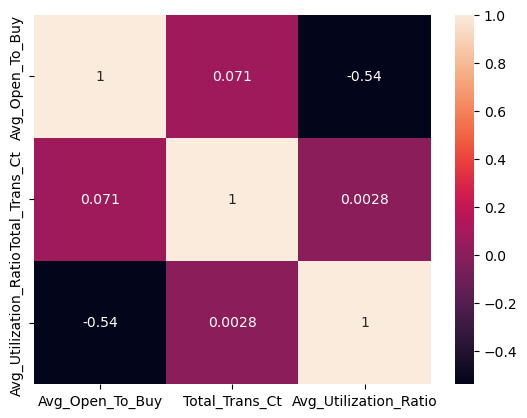

In [29]:
sns.heatmap( data[['Avg_Open_To_Buy','Total_Trans_Ct','Avg_Utilization_Ratio']].corr(),annot=True)

In [30]:
data_clean = data[['Avg_Open_To_Buy', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']] # Se realiza nuevo dataset en el que se toman en consideración únicamente las cuatro columnas de interés
data_clean

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,11914.0,42,0.061
1,7392.0,33,0.105
2,3418.0,20,0.000
3,796.0,20,0.760
4,4716.0,28,0.000
...,...,...,...
10122,2152.0,117,0.462
10123,2091.0,69,0.511
10124,5409.0,60,0.000
10125,5281.0,62,0.000


In [31]:
data_clean.describe() # Se muestra estructura estadística del nuevo dataset

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000
mean,7469.139637,64.858695,0.274894
std,9090.685324,23.472570,0.275691
min,3.000000,10.000000,0.000000
25%,1324.500000,45.000000,0.023000
50%,3474.000000,67.000000,0.176000
75%,9859.000000,81.000000,0.503000
max,34516.000000,139.000000,0.999000


In [32]:
data_clean

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,11914.0,42,0.061
1,7392.0,33,0.105
2,3418.0,20,0.000
3,796.0,20,0.760
4,4716.0,28,0.000
...,...,...,...
10122,2152.0,117,0.462
10123,2091.0,69,0.511
10124,5409.0,60,0.000
10125,5281.0,62,0.000


In [33]:
temp = pd.DataFrame() # Se crea un dataframe para valores temporales

for col in data_clean.columns: # Se itera una variable col que recorrerá el dataset con las cuatro columnas clasificadas
    column = data_clean[col] # Se selecciona la columna completa de la variable recorrida
 
    Q1 = column.quantile(0.25) # Se establece el primer cuartil (25% de los datos)
    Q3 = column.quantile(0.75) # Se establece el segundo cuartil (75% de los datos)

    IQR = Q3 - Q1 # Se calcula rango intercuartílico
    
    limite_inferior = Q1 - 1.5 * IQR # Se determina límite inferior restando al primer cuartil el 150% del rango intercuartílico
    limite_superior = Q3 + 1.5 * IQR # Se determina límite superior sumando al tercer cuartil el 150% del rango intercuartílico

    data_clean[col + '_outliers'] = (column < limite_inferior) | (column > limite_superior) # Se crea nueva columna en la que se indica si cada fila de cada variable cuenta con outliers
    print(f'{Q1 =} {Q3=} {IQR =} {limite_inferior = } {limite_superior =}') # Se imprimen los rangos y límites

Q1 =1324.5 Q3=9859.0 IQR =8534.5 limite_inferior = -11477.25 limite_superior =22660.75
Q1 =45.0 Q3=81.0 IQR =36.0 limite_inferior = -9.0 limite_superior =135.0
Q1 =0.023 Q3=0.503 IQR =0.48 limite_inferior = -0.697 limite_superior =1.2229999999999999


C:\Users\Mario T\AppData\Local\Temp\ipykernel_5300\2784091094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < limite_inferior) | (column > limite_superior) # Se crea nueva columna en la que se indica si cada fila de cada variable cuenta con outliers
C:\Users\Mario T\AppData\Local\Temp\ipykernel_5300\2784091094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < limite_inferior) | (column > limite_superior) # Se crea nu

In [34]:
data_clean # Se muestra nuevo dataset con cada columna que indica si se cuenta con outliers

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Avg_Open_To_Buy_outliers,Total_Trans_Ct_outliers,Avg_Utilization_Ratio_outliers
0,11914.0,42,0.061,False,False,False
1,7392.0,33,0.105,False,False,False
2,3418.0,20,0.000,False,False,False
3,796.0,20,0.760,False,False,False
4,4716.0,28,0.000,False,False,False
...,...,...,...,...,...,...
10122,2152.0,117,0.462,False,False,False
10123,2091.0,69,0.511,False,False,False
10124,5409.0,60,0.000,False,False,False
10125,5281.0,62,0.000,False,False,False


In [35]:
data_clean.groupby(by='Avg_Open_To_Buy_outliers').count() # Se agrupa dataset por columna de promedio de líneas de crédito

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Total_Trans_Ct_outliers,Avg_Utilization_Ratio_outliers
Avg_Open_To_Buy_outliers,,,,,
False,9164,9164,9164,9164,9164
True,963,963,963,963,963


In [36]:
data_clean.groupby(by='Total_Trans_Ct_outliers').count() # Se agrupa dataset por columna de edad de clientes

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Avg_Open_To_Buy_outliers,Avg_Utilization_Ratio_outliers
Total_Trans_Ct_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [37]:
data_clean.groupby(by='Avg_Utilization_Ratio_outliers').count() # Se agrupa columna por tasa de utilización de tarjeta

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Avg_Open_To_Buy_outliers,Total_Trans_Ct_outliers
Avg_Utilization_Ratio_outliers,,,,,
False,10127,10127,10127,10127,10127


In [38]:
# Se depura dataset data_clean y solo se seleccionan las columnas que no cuentan con outliers (se eliminan todas las filas con outliers)

data_noout = data_clean[data_clean['Avg_Open_To_Buy_outliers'] == False]
data_noout = data_noout[data_noout['Total_Trans_Ct_outliers'] == False]
data_noout = data_noout[data_noout['Avg_Utilization_Ratio_outliers'] == False]
data_noout.reset_index(drop=True)

data_noout

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Avg_Open_To_Buy_outliers,Total_Trans_Ct_outliers,Avg_Utilization_Ratio_outliers
0,11914.0,42,0.061,False,False,False
1,7392.0,33,0.105,False,False,False
2,3418.0,20,0.000,False,False,False
3,796.0,20,0.760,False,False,False
4,4716.0,28,0.000,False,False,False
...,...,...,...,...,...,...
10122,2152.0,117,0.462,False,False,False
10123,2091.0,69,0.511,False,False,False
10124,5409.0,60,0.000,False,False,False
10125,5281.0,62,0.000,False,False,False


In [39]:
data_noout.describe() # Se evalúa estadísticamente cada columna luego de haber depurado las filas con outliers

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
count,9163.000000,9163.000000,9163.000000
mean,5044.522656,64.379897,0.299937
std,5305.275175,23.024930,0.278105
min,3.000000,10.000000,0.000000
25%,1155.000000,45.000000,0.037500
50%,2849.000000,67.000000,0.219000
75%,7288.500000,80.000000,0.537000
max,22616.000000,131.000000,0.999000


<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

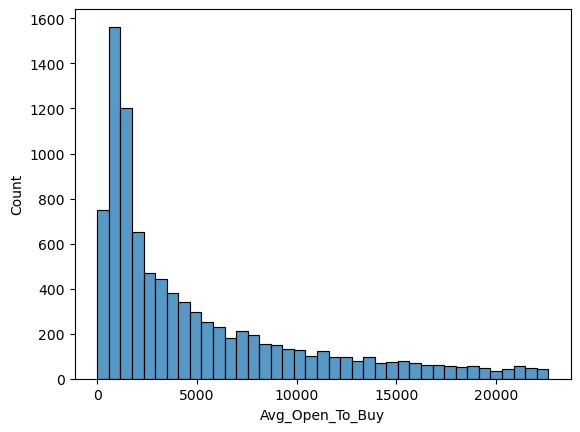

In [40]:
sns.histplot(data=data_noout, x='Avg_Open_To_Buy') # Se grafica data depurada

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

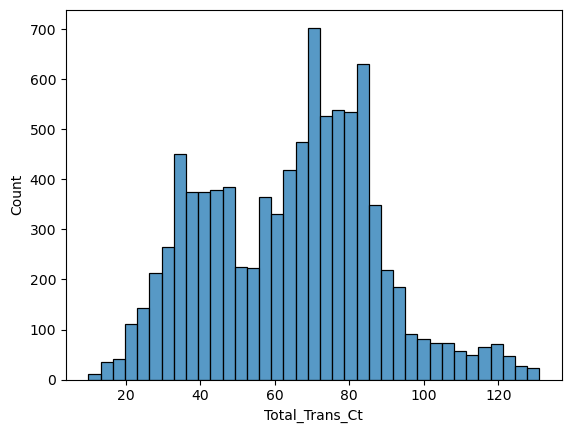

In [41]:
sns.histplot(data=data_noout, x='Total_Trans_Ct')

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Count'>

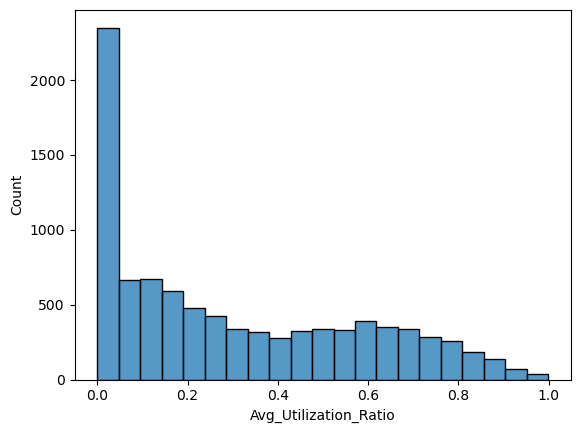

In [42]:
sns.histplot(data=data_noout, x='Avg_Utilization_Ratio')

In [43]:
dfSummary(data_noout) # Se muestra distribución de datos en nuevo dataset

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Avg_Open_To_Buy[float64],Mean (sd) : 5044.5 (5305.3)min < med < max:3.0 < 2849.0 < 22616.0IQR (CV) : 6133.5 (1.0),"6,031 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjElEQVR4nO3dP2/aQBiA8fcgIBOoLUQCm5fuHTyy9Bv0w3btiARfgKFLJxaEZIERThDIdZdSVUrEn7s48Xt6fnPOZng44jtLZ8qyFKDuGh/9AYBr3F36A2NMR0Taltc/lGX5bDkW+OdsqMaYzmAw+BaGYd/m4tvtdm2M+U6scHVpRm2HYdgfj8fPURTtb7lwlmXBdDrtp2naFhFChZOLP/0iIlEU7YfD4ZPF9TsWY4AXeJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS46rAJW0VRtEQkNMbYXoJzqiAiFYaa53nreDx+ieO42Ww2bzr654RzqnBSWaiHw+EuCIL7JEn2o9Fofet4zqnC/yr96RcR6Xa7tmdUiXBOFf7iYQoqECpUIFSoQKhQgVChAqFCBUKFCpWvo7pw3IJl+9UjtQ3VdQuW7Ve/1DZUly1Ytl/9U9tQTxy2YNl+9UjtQ7XFK4Z+8TJUXjH0j5eh8oqhf7wM9YRXDP3hdaguWMOtF0J9BWu49UOor3Bdw51MJsM0TR+MMVub2xP4S4R6hs3/uK6z8Waz2RljfoiI1WqFeBo6ob4xl9l4uVx+ms1mX+M4frBdVnMMvbaRE2pFbGbj9XrdcVlWcw39DWbzhoj8thx79ktCqDVku6zmErpr5EVRtPI8/9zr9X41Go3jreMvPYASqoc+YjZfLBb9+Xz+mCTJzypeIroq1CzLgltuLCKy2+0CEZE8z4PVanX/nuO13rsOn7uu/gCYaYZfM6j09wAAAABJRU5ErkJggg=="">",0(0.0%)
2,Total_Trans_Ct[int64],Mean (sd) : 64.4 (23.0)min < med < max:10.0 < 67.0 < 131.0IQR (CV) : 35.0 (2.8),122 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqklEQVR4nO3dQYriQBSA4VdjK1EhQWx05wUGZuHSQ8xh5wgjeAJv4E4IEjHTwRgzi8HBBsfWSjJdr/J/+3Rn8RNSVl5iyrIUwHVfPvsEgEe8fPYJ+MgY0xeRnuXhx7Is3+o8Hx8Qas2MMf3xePw9DMORzfH7/X5njPlBrO8Rav16YRiOFovFWxRF2TMHJkkSrFarURzHPREh1CuE2pAoirLJZPLL4tB+7SfjARZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECW6j/UOEJqPB8PnfrPp+2I9QbqjwBled5UBTF1yzLfoqIzV4/biDU26yfgNpsNqP1ej04nU6dpk6ujQj1DpsnoHa7HU8/NYDFFFQgVKhAqFDB6XtUhuRw4WyoDMnhmrOhCkNyuOJyqCLCkBz+YDEFFQgVKhAqVCBUqECoUIFQoYLzP0+1TVEUXREJjTG2f8LLHTlCdUiapt08z7/NZrNOp9N5apPjwtcdOUJ1yPF4fAmCYDCfz7PpdLp79nifd+QI1UHD4dB2N07E0x05b0OteK/HgJ5jvAy16r0eA3ru8TLUqvd6DOi5x8tQL2zv9RjQcw8/+EOFRq+oFUdJWNDgr8ZCrTpKwoIG15q8olqPkoiwoMF7jS+mbEdJWNDgGospqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKXo+itFHF6Vtn37JCqB6pOn3r8ltWCNUjVaZvXX/LCqF6yHb6tiiKUBx9QRuhQkTcf0Hbh6Hy3fp2qOMFbcvlchLH8asxZm9zCvcCvxsq361vH9vbhqYXch9dUfluPR7S9ELuoXtUvluPR1V4ZebdXtiZggoPXVGTJAme/cOHwyEQEUnTNNhut4P/ebzW/631vKse/0hfvwEnSrm+AHYgJgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Avg_Utilization_Ratio[float64],Mean (sd) : 0.3 (0.3)min < med < max:0.0 < 0.2 < 1.0IQR (CV) : 0.5 (1.1),947 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACs0lEQVR4nO3dvU7bUBiH8f9JID35kE0CTTaWDgyVOkRi4QI69mJ7EQwdEUOXTmxIJEoUNzSWmy4NKkIF7JM0fk+f38yxMzzyx5sYu/V6LaDuGvv+AMBrHLz0B865tqRWxe2v1uv1suJa4MGzoTrn2sfHx5+SJOlX2fh8Pp865z4TK0K9dERtJUnSv7i4WKZpel9mw7PZzF9eXvbv7u5akggVQV489UtSmqb3w+Hwe4XttyusAZ7gZgomECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmPCq/+FfVVEUh5IS51zVTfD6H0jaYahZlh3mef7h9PS02Ww2S71RZYPX/2BjZ6GuVqsD731nPB7fj0ajadn1vP4Hf9rpqV+Sut1u1Vf/SLz+B79xMwUTCBUmECpMIFSYsPObqRCBc1hmsBGpbaihc1hmsHGpbaghc1hmsPGpbagbAXNYZrARqX2oFjnn2pJaFZc3JP0M2H2U1+aE+hcBsfnBYPAxTdNu2YVFURxmWfau1+t9azQaeYV9R3ttHm2ogRODyrHlee4lvT8/P/9ycnIyL7P25uamf319/XY8Hn/l9xGPRRlq6MRgC7F1vPd52Wvr6XTalsJ+H1EURaIIR3pRhhr6y61txLYPMY/0ogx1o+qRaZ+xhYh5pBd1qP+rGEd6fNcPEzii4kGdn3EjVEiq/zNuhApJ9X/GjVDxSF2fceNmCiYQKkzg1I+t2eUTGYSKrdj117evCnU2m/myO14sFl6Ssizzt7e3nX+53uq+rX5uSZpMJj3vfefs7MwdHR39KLN2uVy+ubq6enZi8Atkz5JaDGqEYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Avg_Open_To_Buy_outliers[bool],1. False,"9,163 (100.0%)",,0(0.0%)
5,Total_Trans_Ct_outliers[bool],1.

In [44]:
data_noout = data_noout[['Avg_Open_To_Buy' , 'Total_Trans_Ct', 'Avg_Utilization_Ratio']] # Se eliminan columnas que indicaban los valores booleanos de outliers
data_noout

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,11914.0,42,0.061
1,7392.0,33,0.105
2,3418.0,20,0.000
3,796.0,20,0.760
4,4716.0,28,0.000
...,...,...,...
10122,2152.0,117,0.462
10123,2091.0,69,0.511
10124,5409.0,60,0.000
10125,5281.0,62,0.000


In [45]:
data_bc = power_transform(X=data_noout, method='yeo-johnson') # Se normaliza data mediante método yeo-johnson, ya que este se emplea cuando el dataset cuenta con valores nulos 
data_bc = pd.DataFrame(data_bc, columns=data_noout.columns)
data_bc

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,1.279153,-0.962622,-0.874254
1,0.824120,-1.397392,-0.628200
2,0.125514,-2.075356,-1.256266
3,-1.078935,-2.075356,1.446905
4,0.411684,-1.649836,-1.256266
...,...,...,...
9158,-0.272715,2.144753,0.762640
9159,-0.296968,0.237763,0.896277
9160,0.535887,-0.148532,-1.256266
9161,0.514091,-0.061655,-1.256266


[Text(0.5, 1.0, 'Data normalizada: Avg_Open_To_Buy')]

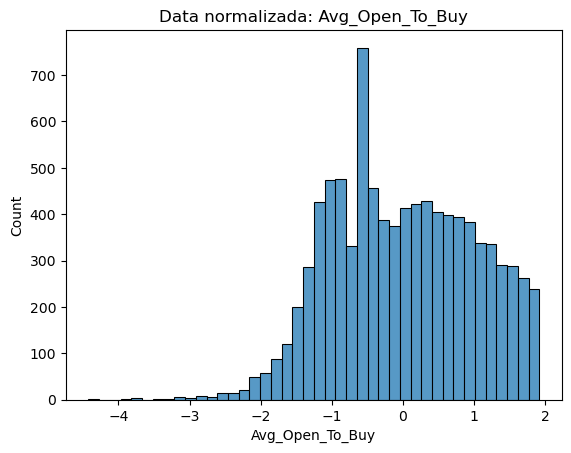

In [69]:
sns.histplot(data_bc,x= 'Avg_Open_To_Buy').set(title="Data normalizada: Avg_Open_To_Buy") # Se grafica data normalizada

[Text(0.5, 1.0, 'Data normalizada: Total_Trans_Ct')]

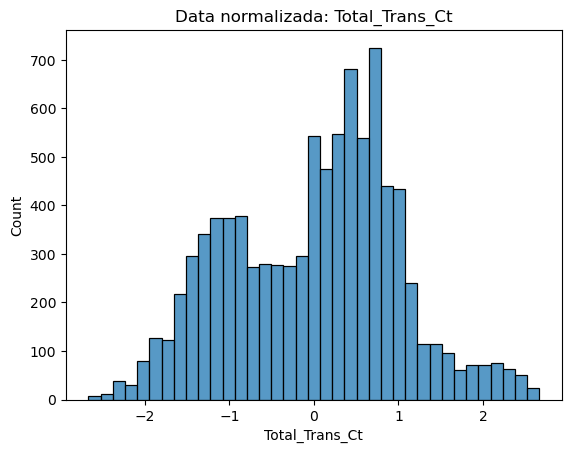

In [70]:
sns.histplot(data_bc,x= 'Total_Trans_Ct').set(title="Data normalizada: Total_Trans_Ct")

[Text(0.5, 1.0, 'Data normalizada: Avg_Utilization_Ratio')]

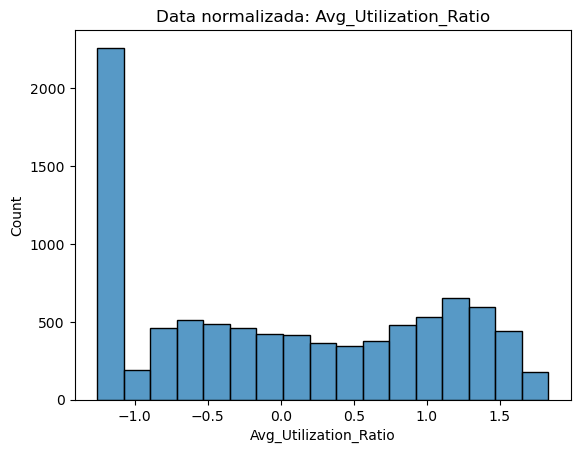

In [71]:
sns.histplot(data_bc,x= 'Avg_Utilization_Ratio').set(title="Data normalizada: Avg_Utilization_Ratio")

In [49]:
data_bc.describe()

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
count,9.163000e+03,9.163000e+03,9.163000e+03
mean,-1.985146e-16,-8.436871e-16,6.203582e-18
std,1.000055e+00,1.000055e+00,1.000055e+00
min,-4.422396e+00,-2.664573e+00,-1.256266e+00
25%,-7.849208e-01,-8.223573e-01,-1.015399e+00
50%,-3.303096e-02,1.529217e-01,-8.339761e-02
75%,8.109476e-01,6.952713e-01,9.632762e-01
max,1.918935e+00,2.665403e+00,1.831687e+00


In [50]:
from sklearn.cluster import KMeans # Se importa librería para aplicación de K-means
from sklearn.metrics import silhouette_score
import numpy as np

In [51]:
inercia = [] # Se crea tupla para guardar resultados de inercias
ks = [] # Se crea tupla para guardar resultados de cantidad de clústers

for k in range(1,15): # Se itera de 1 a 15 para obtener datos suficientes para realizar gráfica de codo y determinar k óptimo
    modelo_iterado = KMeans(n_clusters = k, random_state = 2) # Se realiza k-means con k número de clústers y semilla 2
    modelo_iterado.fit(data_bc) # Al modelo resultante se envía como parámetro el dataset normalizado
    inercia.append(modelo_iterado.inertia_) # Se guarda la inercia para cada k
    ks.append(k)
    if len(np.unique(modelo_iterado.labels_)) > 1: # Si hay más de dos clusters, se calcula el índice de silueta para determinar la calidad de k óptima
        silhouette_avg = silhouette_score(data_bc, modelo_iterado.labels_)
        print("Índice de Silueta:", silhouette_avg, ", # clusters: ", k)

c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.40780679424260613 , # clusters:  2


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.374610235117259 , # clusters:  3


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.3537009978931891 , # clusters:  4


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.35441083037232596 , # clusters:  5


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.35427160845068045 , # clusters:  6


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.3556599539968127 , # clusters:  7


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.3724948134049744 , # clusters:  8


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.36883689291729366 , # clusters:  9


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.33680636587915835 , # clusters:  10


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.338462034474859 , # clusters:  11


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.33757393066990726 , # clusters:  12


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.3229800799835108 , # clusters:  13


c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Índice de Silueta: 0.3239320951465038 , # clusters:  14


In [52]:
codo = { # Se crea un diccionario con la inercia correspondiente a cada k
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)


<Axes: xlabel='k', ylabel='inercia'>

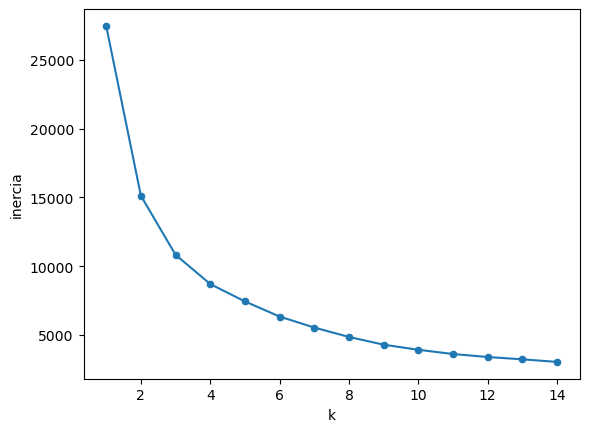

In [53]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True) # Se realiza gráfica de codo
sns.lineplot(data=codo, x='k', y='inercia',)

In [72]:
modelo = KMeans(n_clusters=2,random_state = 2) # La cantidad óptima de clústers ha demostrado ser 2 (habiendo evaluado tanto el método del codo como el índice de silueta), por lo que se genera nuevamente el modelo con 4 clústers
modelo.fit(data_bc)

c:\Users\Mario T\anaconda3\envs\ProyectoStatLear2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=2)

In [73]:
data_noout['cluster'] = modelo.labels_ # Se muestra tabla con el clúster correspondiente a cada fila
data_noout

C:\Users\Mario T\AppData\Local\Temp\ipykernel_5300\3758202905.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,cluster
0,11914.0,42,0.061,0
1,7392.0,33,0.105,0
2,3418.0,20,0.000,0
3,796.0,20,0.760,1
4,4716.0,28,0.000,0
...,...,...,...,...
10122,2152.0,117,0.462,1
10123,2091.0,69,0.511,1
10124,5409.0,60,0.000,0
10125,5281.0,62,0.000,0


In [74]:
data_noout.groupby(by='cluster').count() # Se agrupa data por conteo de clústers

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
cluster,,,
0,5422,5422,5422
1,3741,3741,3741


In [75]:
data_noout.groupby(by='cluster').agg(['min','mean','max']) # Se determina valor mínimo, medio y máximo para cada variable evaluada

Avg_Open_To_Buy                       Total_Trans_Ct                  \
                    min         mean      max            min       mean  max   
cluster                                                                        
0                1268.3  7695.954168  22616.0             10  63.656953  131   
1                   3.0  1201.683400   4090.0             12  65.427693  131   

        Avg_Utilization_Ratio                   
                          min      mean    max  
cluster                                         
0                       0.000  0.096614  0.381  
1                       0.212  0.594622  0.999

[Text(0.5, 1.0, 'Gráfico de dispersión: Total_Trans_Ct vs Avg_Utilization_Ratio, dividido por clusters')]

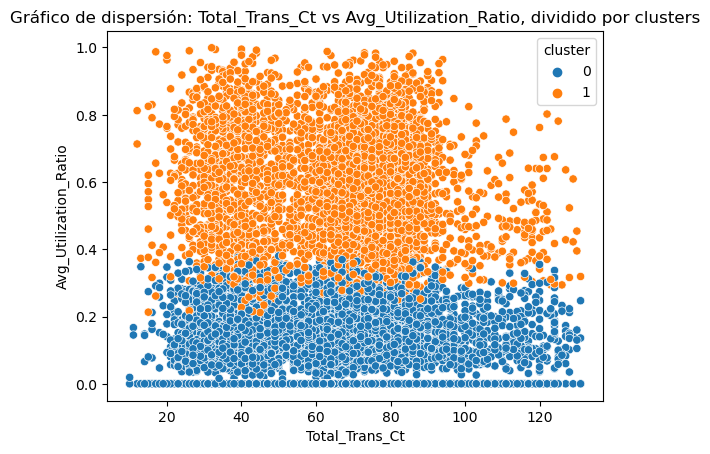

In [81]:
sns.scatterplot(data=data_noout,x='Total_Trans_Ct', y='Avg_Utilization_Ratio', hue='cluster').set(title="Gráfico de dispersión: Total_Trans_Ct vs Avg_Utilization_Ratio, dividido por clusters") # Se grafica Total_Trans_Ct contra Avg_Utilization_Ratio mostrando la dispersión de cada clúster

[Text(0.5, 1.0, 'Gráfico de dispersión: Total_Trans_Ct vs Avg_Open_To_Buy, dividido por clusters')]

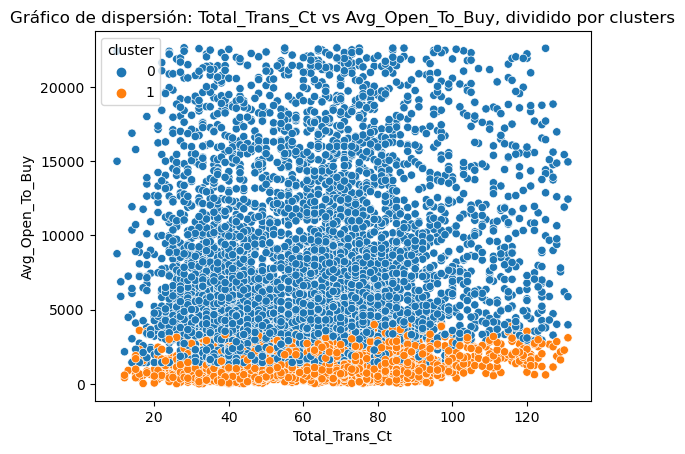

In [82]:
sns.scatterplot(data=data_noout,x='Total_Trans_Ct', y='Avg_Open_To_Buy', hue='cluster').set(title="Gráfico de dispersión: Total_Trans_Ct vs Avg_Open_To_Buy, dividido por clusters") # Se grafica Total_Trans_Ct contra Avg_Utilization_Ratio mostrando la dispersión de cada clúster

[Text(0.5, 1.0, 'Gráfico de dispersión: Avg_Open_To_Buy vs Avg_Utilization_Ratio, dividido por clusters')]

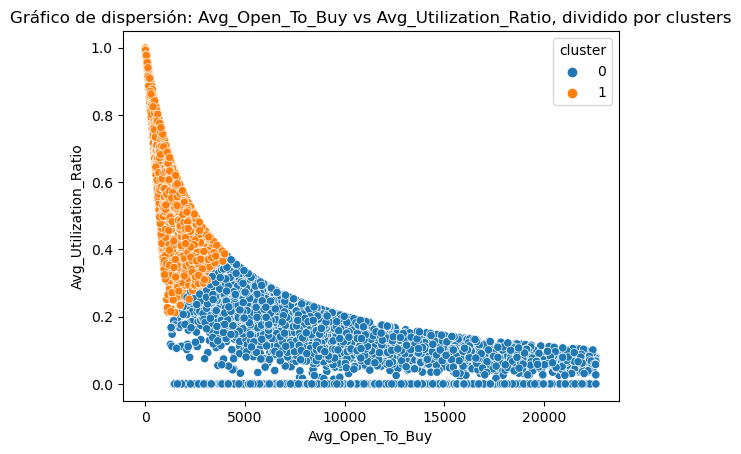

In [85]:
sns.scatterplot(data=data_noout,x='Avg_Open_To_Buy', y='Avg_Utilization_Ratio', hue='cluster').set(title='Gráfico de dispersión: Avg_Open_To_Buy vs Avg_Utilization_Ratio, dividido por clusters') # Se grafica Total_Trans_Ct contra Avg_Utilization_Ratio mostrando la dispersión de cada clúster

In [79]:
import plotly.express as px # Se importa librería para graficar tridimensionalmente

In [80]:
fig = px.scatter_3d(data_noout, x = 'Total_Trans_Ct', # Se realiza gráfica tridimensional, relacionando Total_Trans_Ct, Avg_Utilization_Ratio y Avg_Open_To_Buy y la separación de cada clúster
y = 'Avg_Utilization_Ratio',
z = 'Avg_Open_To_Buy',
color = 'cluster')

fig.show()